In [53]:
import numpy as np
import pandas as pd
from utils.preprocess import ccba_preprocess

In [54]:
def summary(df, desp_dict):
    print("total: ", len(df))
    for c in df.columns:
        if df[c].dtype == np.float64:
            print(
                f"{c:16s}: unique: {len(df[c].unique()):>6d}, " +
                f"dtype: {str(df[c].dtype):7s}, " +
                f"min: {df[c].min():>9.2e}, " +
                f"max: {df[c].max():>9.2e}, " +
                f"std: {df[c].std():>9.2e}"
            )
        elif df[c].dtype == np.int64:
            print(
                f"{c:16s}: unique: {len(df[c].unique()):>6d}, " +
                f"dtype: {str(df[c].dtype):7s}, " +
                f"min: {df[c].min():>9d}, " +
                f"max: {df[c].max():>9d}, " +
                f"std: {df[c].std():>9.2f}"
            )
        else:
            print(
                f"{c:16s}: unique: {len(df[c].unique()):>6d}, " +
                f"dtype: {str(df[c].dtype):7s}"
            )
        print("意義: ", desp_dict[c][0])
        print("類別: ", desp_dict[c][1])
        print("備註: ", desp_dict[c][2])

In [55]:
desp = pd.read_excel("data/訓練資料欄位說明_v2.xlsx")
desp["表格關鍵字"] = desp["表格關鍵字"].ffill()
desp_dict = {k: {} for k in desp["表格關鍵字"].unique()}
for i, row in desp.iterrows():
    desp_dict[row["表格關鍵字"]][row["訓練資料欄位名稱"]] = (
        row.get("訓練資料欄位中文說明"),
        row.get("資料格式"),
        row.get("備註")
    )

In [191]:
ccba = pd.read_csv("data/public_train_x_ccba_full_hashed.csv")
# summary(ccba, desp_dict["ccba"])


('0015cc01f553512007705edf855baa16f1b57a16fb107e0882c5cb0535d297a5',                                                 cust_id    lupay  byymm  \
6102  0015cc01f553512007705edf855baa16f1b57a16fb107e...   3920.0      0   
6103  0015cc01f553512007705edf855baa16f1b57a16fb107e...  16576.0     30   
6104  0015cc01f553512007705edf855baa16f1b57a16fb107e...   8653.0     61   
6105  0015cc01f553512007705edf855baa16f1b57a16fb107e...   5045.0     91   
6106  0015cc01f553512007705edf855baa16f1b57a16fb107e...   4334.0    122   
6107  0015cc01f553512007705edf855baa16f1b57a16fb107e...   4396.0    153   
6108  0015cc01f553512007705edf855baa16f1b57a16fb107e...   4183.0    183   
6109  0015cc01f553512007705edf855baa16f1b57a16fb107e...   7077.0    214   
6110  0015cc01f553512007705edf855baa16f1b57a16fb107e...   7480.0    244   
6111  0015cc01f553512007705edf855baa16f1b57a16fb107e...   5671.0    275   
6112  0015cc01f553512007705edf855baa16f1b57a16fb107e...   3183.0    306   
6113  0015cc01f553512007705edf8

In [93]:
cdtx = pd.read_csv("data/public_train_x_cdtx0001_full_hashed.csv")
summary(cdtx, desp_dict["cdtx"])
cust_id_cdtx = set(cdtx.cust_id.unique())

total:  1043014
cust_id         : unique:   3945, dtype: object 
意義:  顧客編號
類別:  nan
備註:  nan
date            : unique:    395, dtype: int64  , min:         0, max:       394, std:    111.47
意義:  消費日期
類別:  類別型
備註:  經過神秘轉換，數字序列有前後順序意義
country         : unique:    128, dtype: int64  , min:         1, max:       140, std:     26.16
意義:  消費地國別
類別:  類別型
備註:  經過神秘轉換，(130 = 台灣)
cur_type        : unique:     51, dtype: int64  , min:         0, max:        56, std:      8.44
意義:  消費地幣別
類別:  類別型
備註:  經過神秘轉換，(47 = 台幣)
amt             : unique:  40067, dtype: float64, min:  0.00e+00, max:  1.28e+08, std:  1.67e+05
意義:  交易金額-台幣
類別:  數值型
備註:  經過神秘轉換


In [131]:
custinfo = pd.read_csv("data/public_train_x_custinfo_full_hashed.csv")
# summary(custinfo, desp_dict["custinfo"])
for cust_id, series in custinfo.groupby("cust_id"):
    if len(series) > 1:
        risk_rank = len(series.risk_rank.unique())
        occupation_code = len(series.occupation_code.unique())
        total_asset = len(series.total_asset.unique())
        AGE = len(series.AGE.unique())
        if risk_rank + occupation_code + AGE > 3:
            print(cust_id, risk_rank, occupation_code, AGE)

0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155b9bc5d18de6b65f381 1 2 1
004fe2a935a6f8e2b171261efa6d53e2cc521709b61ae40ac55d027e7f5763f5 2 2 1
01b9a8458ee27ddcf46d2506a9b44e43c9d094520b0fa4d0609c280441a43c7c 1 2 1
02982312a0e1a9270f6049893aaf7c81ea7876bdcf9214f79dbb79f37bcdbf8a 1 1 2
03d74e7d06f232422a32757622ef4bab977120bcbc72b90a0a946ae25c71e2ae 1 2 1
04ba5e7e33329bff3a79254454d36a38217791b93f5d5b0abea8f62d3682eecb 1 1 2
0658224f10ea4c5c8b4252f1bef32ee1071dc504bfc6704a706a6b4a21f2a116 1 2 1
06c0f1468b20e4ec8031c138a913093ab53a384a2c88cb8c97d9ff61adfab5d0 2 1 1
06c881046448226f804df9100ba0e9fc8212373e302d77c4f68b893cda092913 1 2 1
08d2b4ae3c03515cac79354b8f30e3287a8d427f8af2d6ece78074fa45c148d0 1 2 1
094c70ecdc5d71000fe12e4ef9eb341ba07f7c18233a96aa661cd0995f4956d0 1 2 1
09a2b041606f6770f08f9039d5f62a43e7d0dbd43f8c15456a32961244ca3aef 2 1 1
0bec593b3a48cddfbb0f356e8d64186c003bff70fbfd44b496f691c659b9de0f 2 1 1
0c03ff82e67785f3fb90ff539e6239d0a8121c905e05bdd776d9174776a15734 1 2 1
0c6794

In [96]:
dp = pd.read_csv("data/public_train_x_dp_full_hashed.csv")
summary(dp, desp_dict["dp"])

total:  1969818
cust_id         : unique:   6196, dtype: object 
意義:  顧客編號
類別:  nan
備註:  nan
debit_credit    : unique:      2, dtype: object 
意義:  借貸別
類別:  類別型
備註:  nan
tx_date         : unique:    395, dtype: int64  , min:         0, max:       394, std:    112.96
意義:  交易日期
類別:  類別型
備註:  經過神秘轉換，數字序列有前後順序意義
tx_time         : unique:     24, dtype: int64  , min:         0, max:        23, std:      6.35
意義:  交易時間
類別:  類別型
備註:  經過神秘轉換，數字序列有前後順序意義
tx_type         : unique:      3, dtype: int64  , min:         1, max:         3, std:      0.24
意義:  交易類別
類別:  類別型
備註:  nan
tx_amt          : unique: 236501, dtype: float64, min: -2.62e+07, max:  7.50e+08, std:  1.91e+06
意義:  交易金額
類別:  數值型
備註:  經過神秘轉換
exchg_rate      : unique:   3573, dtype: float64, min:  2.25e-01, max:  1.31e+02, std:  8.27e+00
意義:  匯率
類別:  數值型
備註:  nan
info_asset_code : unique:     22, dtype: int64  , min:         0, max:        21, std:      5.27
意義:  資訊資產代號
類別:  類別型
備註:  經過神秘轉換，tx_type = 1且info_asset_code = 12時，該交易為臨櫃現金交易


In [97]:
remit = pd.read_csv("data/public_train_x_remit1_full_hashed.csv")
summary(remit, desp_dict["remit"])

total:  17167
cust_id         : unique:   1144, dtype: object 
意義:  顧客編號
類別:  nan
備註:  nan
trans_date      : unique:    280, dtype: int64  , min:         0, max:       393, std:    106.08
意義:  外匯交易日(帳務日)
類別:  類別型
備註:  經過神秘轉換，數字序列有前後順序意義
trans_no        : unique:      5, dtype: int64  , min:         0, max:         4, std:      1.29
意義:  交易編號
類別:  類別型
備註:  經過神秘轉換，代表不同的匯出方式
trade_amount_usd: unique:  12165, dtype: float64, min:  0.00e+00, max:  2.28e+06, std:  7.86e+04
意義:  交易金額(折合美金)
類別:  數值型
備註:  經過神秘轉換


In [124]:
alert_date = pd.read_csv("data/public_x_alert_date.csv")
summary(alert_date, desp_dict["alert_date"])

total:  1845
alert_key       : unique:   1845, dtype: int64  , min:    352249, max:    365073, std:   3561.99
意義:  alert主鍵
類別:  nan
備註:  nan
date            : unique:     19, dtype: int64  , min:       365, max:       393, std:      7.77
意義:  alert主鍵發生日期
類別:  類別型
備註:  經過神秘轉換，數字序列有前後順序意義


25751

In [205]:
train_alert_date = pd.read_csv("data/train_x_alert_date.csv")
# summary(train_alert_date, desp_dict["alert_date"])
custinfo.merge(
    pd.concat((train_alert_date, alert_date), ignore_index=True),
    left_on="alert_key", right_on="alert_key"
).sort_values(by="alert_key")
# custinfo.head()

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,date
1845,171142,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,3,0
1846,171152,7e42b5dca9b28ee8e5545beb834361e90e6197d176b389...,3,13.0,599497.0,6,0
1847,171177,a6cdf6302aead77112013168c6d546d2df3bcb551956d2...,1,19.0,51160.0,4,0
1848,171178,1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...,3,9.0,3634343.0,6,0
1849,171180,67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e...,1,17.0,4076287.0,4,0
...,...,...,...,...,...,...,...
1840,365001,18ee644a371548e9780d701aaa7e0c8c42a7794cdee755...,1,17.0,135072.0,3,393
1841,365004,7f69fa9eab8f397d367e2bb61ee1fa008999a0aab91e06...,3,12.0,2285386.0,3,393
1842,365008,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,3,19.0,1230244.0,2,393
1843,365009,d24d46c19002ab1f9a02801af5e4be6a154b3c5adc0417...,1,17.0,162418.0,2,393


In [101]:
train_y = pd.read_csv("data/train_y_answer.csv")
summary(train_y, desp_dict["y"])

total:  23906
alert_key       : unique:  23906, dtype: int64  , min:    171142, max:    352132, std:  54601.95
意義:  alert主鍵
類別:  nan
備註:  nan
sar_flag        : unique:      2, dtype: int64  , min:         0, max:         1, std:      0.10
意義:  alert主鍵報SAR與否
類別:  類別型
備註:  (0=未報SAR；1=有報SAR)


In [151]:
tmp = custinfo.set_index("alert_key").cust_id
from collections import Counter
count = Counter()
for i, row in train_y.iterrows():
    count.update({tmp[row.alert_key]: 1})
    
a = Counter()
for i , row in train_y.iterrows():
    if row.sar_flag == 1:
        a[tmp[row.alert_key]] = count[tmp[row.alert_key]]
b = count - a

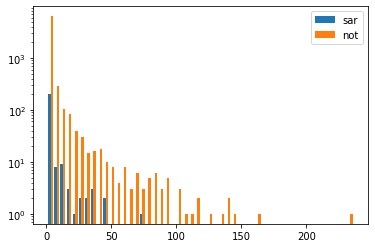

In [180]:
import matplotlib.pyplot as plt
plt.hist((sorted(a.values()), sorted(b.values())), density=False, bins=50, label=("sar", "not"), log=True)
# plt.hist(, density=True, bins=10, label="b", log=True)
plt.legend()

In [209]:
alert_date.date.to_numpy(dtype=np.float32)

array([365., 365., 365., ..., 393., 393., 393.], dtype=float32)

In [235]:
import pickle
with open("data/data.pkl", "rb") as f:
    data = pickle.load(f)

In [238]:
print(len(data))
test_cust_id = list(data.keys())[100]
for key, value in data[test_cust_id].items():
    if isinstance(value, dict):
        for key2, value2 in value.items():
            if isinstance(value2, np.ndarray):
                print(key, key2, value2.shape)
            else:
                print(key, key2, value2[0])
    elif isinstance(value, list):
        print(key, len(value), value[0])

7708
ccba cust_id 03d4cbfcb065501bebb2b75ea4df2b779df0192a183af30d3b7c00c7b0020a82
ccba date (13,)
ccba cat (13, 0)
ccba num (13, 8)
cdtx cust_id 03d4cbfcb065501bebb2b75ea4df2b779df0192a183af30d3b7c00c7b0020a82
cdtx date (51,)
cdtx cat (51, 2)
cdtx num (51, 1)
custinfo alert_key 359389
custinfo cust_id 03d4cbfcb065501bebb2b75ea4df2b779df0192a183af30d3b7c00c7b0020a82
custinfo date (1,)
custinfo cat (1, 3)
custinfo num (1, 1)
dp cust_id 03d4cbfcb065501bebb2b75ea4df2b779df0192a183af30d3b7c00c7b0020a82
dp date (286,)
dp cat (286, 8)
dp num (286, 2)
remit cust_id 03d4cbfcb065501bebb2b75ea4df2b779df0192a183af30d3b7c00c7b0020a82
remit date (22,)
remit cat (22, 1)
remit num (22, 1)
event_index 373 ('ccba', 0, 0.0)


In [241]:
import torch
import torch.nn as nn
layer = nn.Embedding(5,8)
test = torch.randint(0, 5, (2,4))
print(test.shape)
layer(test).shape

torch.Size([2, 4])


torch.Size([2, 4, 8])

In [244]:
with open("data/mapping.pkl", 'rb') as f:
    mapping = pickle.load(f)
for k, v in mapping.items():
    print(k, len(v))

country 128
cur_type 51
risk_rank 4
occupation_code 22
AGE 11
debit_credit 2
tx_time 24
tx_type 3
info_asset_code 22
fiscTxId 30
txbranch 350
cross_bank 2
ATM 2
trans_no 5
dict_keys(['country', 'cur_type', 'risk_rank', 'occupation_code', 'AGE', 'debit_credit', 'tx_time', 'tx_type', 'info_asset_code', 'fiscTxId', 'txbranch', 'cross_bank', 'ATM', 'trans_no'])
